In [ ]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('/content/Bank_Customerdata.csv')

# Check for missing values
print(df.isnull().sum())

df.fillna(df.median(), inplace=True)



ID                    0
Age                   0
Experience            0
Income                0
Zipcode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64


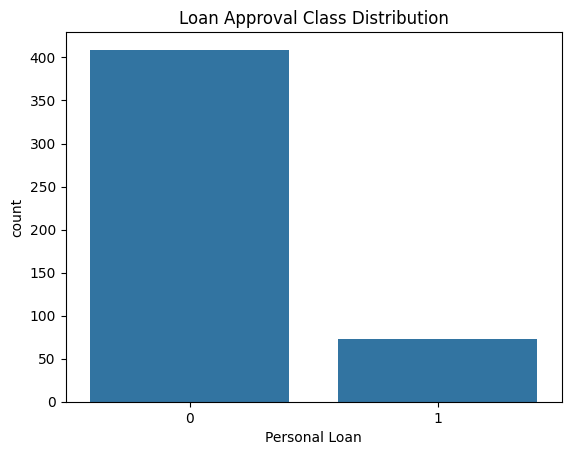

Personal Loan
0    0.848548
1    0.151452
Name: proportion, dtype: float64


In [ ]:
df.dropna(inplace=True)

# anomalous values

for col in ["Income", "CCAvg", "Mortgage"]:
    df = df[np.abs(df[col] - df[col].mean()) <= (3 * df[col].std())]

# Handling Class Imbalance

sns.countplot(x=df["Personal Loan"])
plt.title("Loan Approval Class Distribution")
plt.show()

print(df["Personal Loan"].value_counts(normalize=True))  # Check class ratios



In [ ]:
# Feature Engineering

df.drop(columns=["ID", "Zipcode"], errors="ignore", inplace=True)

print("Columns after dropping unnecessary features:", df.columns.tolist())

# Normalize/Standardize Numerical Features

scaler = StandardScaler()
numerical_features = ["Age", "Experience", "Income", "CCAvg", "Mortgage", "Family"]
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("First 5 rows of scaled numerical features:\n", df[numerical_features].head())

Columns after dropping unnecessary features: ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']
First 5 rows of scaled numerical features:
         Age  Experience    Income     CCAvg  Mortgage    Family
0 -0.055515   -0.085029  0.309475 -0.768081 -1.373176 -1.347264
1 -0.365455   -1.623299 -0.747220  1.450470  0.672222 -1.347264
2 -0.262142   -1.073917  0.693727 -0.898485  0.571629 -0.648253
3  1.597501   -1.183793  1.692784  1.397876  1.108127  0.749769
4  0.564366    0.244600  1.270106 -1.125075  1.228839 -1.347264


In [11]:
# Data Splitting

X = df.drop(columns=["Personal Loan"])  # Features
y = df["Personal Loan"]  # Target variable


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Shape: {X_train.shape}, Testing Shape: {X_test.shape}")


Training Shape: (385, 11), Testing Shape: (97, 11)
